Fundametally, the qualities of good functions all reinforce the idea functions are abstractions.

- Each function should have exactly one job. That job should be identifiable with a short name and characterizable in a single line to text. Functions that perform multiple jobs in sequence should be divided into multiple functions.
- Don't repreat yourself is a central tenet of software engineering. The so-called DRY logic. Instead, that logic should be implemented once, given a name, and applied multiple times. If you find yourself copying and pasting a block of code, you have probably found an opportunity for function abstraction.
- Functions should be defined generally. Squaring is not in the Python Library precisely because it is a special of the **pow** function, which raises numbers to arbitrary powers.

#### Document

In [3]:
def pressure(v, t, b):
    """Compute the pressure in pascals of an ideal gas.
    Applies the ideal gas law: http://en.wikipedia.org
    
    v -- volume of gas, in cubic meters
    t -- absolute temperature in degree kelvin
    n -- particles of gas
    """
    k = 1.38e-23 # Boltzmann's constant
    return n * k * t /v


In [4]:
help(pressure)

Help on function pressure in module __main__:

pressure(v, t, b)
    Compute the pressure in pascals of an ideal gas.
    Applies the ideal gas law: http://en.wikipedia.org
    
    v -- volume of gas, in cubic meters
    t -- absolute temperature in degree kelvin
    n -- particles of gas



#### Default Argument Values
A consequence of defining general functions is the introduction of additional arguments. Functions with many arguments can be awkward to call and difficult to read.

In Python, we can provide default values for the arguments of a function. When calling that function, arguments with default values are optional. If they are not provided, then the default value is bound to the formal parameter name instead. For instance, if an application commonly computes pressure for once mole of particles, this value can be provided as a default:

In [8]:
def pressure(v, t, n=6.022e23):
    k = 1.38e-23
    return n * k * t / v

In [9]:
pressure(1,273.15)

2269.974834

### Currying
We can use higher-order-functions to convert a function that takes multiple arguments into a chain of functions that each take a single argument. More specifically, given a function **f(x,y)**, we can define a function *g* such that **g(x)(y)** is equivalent to **f(x,Y)**. Here *g* is a higher-order-function that takes in a single argument **x** and returns another function that takes in a single argument **y**. This transformation is called *currying*.

Below, we can defined a curried version of the **pow** function:


In [1]:
def curried_pow(x):
    def h(y):
        return pow(x,y)
    return h

In [2]:
curried_pow(2)(3)

8

Currying is useful when we require a function that takes in only a single argument. For example, the *map* pattern applies a single argument function to sequence of values. 

In the above examples, we manually performed the currying transformation on the **pow** function to obtain **curried_pow**. Instead, we can define functions to automate currying, as well as the inverse *uncurrying transformation*:

In [3]:
def curry2(f):
    """Return a curried version of the given two-argument function."""
    def g(x):
        def h(y):
            return f(x,y)
        return h
    return g

def uncurry2(g):
    """Return a two-argument version of the given curried function"""
    def f(x, y):
        return g(x)(y)
    return f

In [4]:
pow_curried = curry2(pow)
pow_curried(2)(3)

8

In [5]:
pow_curried(2)(5)

32

### Lambda Expressions

In the Python, we can create function values on the fly using **lambda** expressions, which evaluate to unamed funtions. A lambda expression evaluates to a function that has a single return expression as its body. Assignment and control statement are not allowed.

In [6]:
def compose(f,g):
    return lambda x: f(g(x))

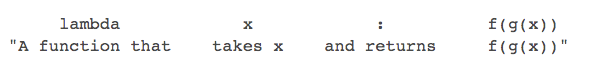

In a environment diagram, the result of a lambda expression is a function as well, named with the geek letter.

### Abstractions and First-Class Functions
In general, programming languages impose restrictions on the ways in which computational elements can be manipulated. Elements with the fewest restrictions are said to have first-class status. Some of the "rights and privileges" of the first-class elements are:

1. They may be bound to names
2. They may be passed as arguments to functions
3. They may be returned as the results of functions
4. They may be included in data structures

### Function Decorators
Python provides special syntax to apply higher-order functions as part of executing a **def** statement, called a decorator. Perhaps the most common example is a trace:

In [8]:
def trace(fn):
    def wrapped(x):
        print('-->', fn, '(', x, ')')
        return fn(x)
    return wrapped

In [9]:
@trace
def triple(x):
    return 3 * x

In [10]:
triple(12)

--> <function triple at 0x10e0c8a60> ( 12 )


36

This decorator is equivalent to:

In [11]:
def triple(x):
    return 3 * x

triple = trace(triple)